# Explore here

In [235]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import base64
from requests import post, get
import json

# load the .env file variables
load_dotenv()

client_id= os.getenv("CLIENT_ID")
client_secret= os.getenv("CLIENT_SECRET")

print(client_id,client_secret)

be49c234e8a747258ad9f65b3afbb204 7e0e330d448f4c40a1aa64e7ed356166


In [236]:
def gettoken():
    auth=client_id + ":" + client_secret
    auth_bt=auth.encode("utf-8")
    auth64=str(base64.b64encode(auth_bt), "utf-8")

    url="https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result=json.loads(result.content)
    token= json_result["access_token"]
    return token

In [237]:
token = gettoken()
print(token)

BQCMka0kZXZZInZh_k8AOq2-bgcHyIzBezwAz1rEVTldMqnMCuWvJVg_HTbyLJjIrrBsVMCkBlhK-VwRZTPe93heRLQeAOloSawDX0GzJpbgn2MoPxs


In [238]:
def get_auth_header(token):
    return {"Authorization": "Bearer " + token}

In [239]:
def search_artist(token,artist):
    url="https://api.spotify.com/v1/search"
    headers= get_auth_header(token)
    query = f"?q={artist}&type=artist&limit=1"
    query_url= url + query
    result=get(query_url,headers=headers)
    json_result=json.loads(result.content)["artists"]["items"]
    if len(json_result) == 0:
        print("No Artist with this name, try again")
        return None
    
    return json_result[0]

In [240]:
search_artist(token,"WOS")

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YCc6xS5Gpj3EkaYGdjyNK'},
 'followers': {'href': None, 'total': 4514745},
 'genres': ['argentine indie', 'trap argentino'],
 'href': 'https://api.spotify.com/v1/artists/5YCc6xS5Gpj3EkaYGdjyNK',
 'id': '5YCc6xS5Gpj3EkaYGdjyNK',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb632866253c99e4531985aa1a',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174632866253c99e4531985aa1a',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178632866253c99e4531985aa1a',
   'width': 160}],
 'name': 'WOS',
 'popularity': 71,
 'type': 'artist',
 'uri': 'spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK'}

In [241]:
def get_tracks(token,artist_id):
    url=f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?market=MX"
    headers= get_auth_header(token)
    result=get(url,headers=headers)
    json_result=json.loads(result.content)["tracks"]
    return json_result


In [242]:
result=search_artist(token,"WOS")
id=result["id"]
songs=get_tracks(token,id)

In [243]:
print(songs)

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YCc6xS5Gpj3EkaYGdjyNK'}, 'href': 'https://api.spotify.com/v1/artists/5YCc6xS5Gpj3EkaYGdjyNK', 'id': '5YCc6xS5Gpj3EkaYGdjyNK', 'name': 'WOS', 'type': 'artist', 'uri': 'spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/0t9xw4VcPabCkwVO77u31Z'}, 'href': 'https://api.spotify.com/v1/albums/0t9xw4VcPabCkwVO77u31Z', 'id': '0t9xw4VcPabCkwVO77u31Z', 'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b273c678828a5678109a13f20ba2', 'width': 640, 'height': 640}, {'url': 'https://i.scdn.co/image/ab67616d00001e02c678828a5678109a13f20ba2', 'width': 300, 'height': 300}, {'url': 'https://i.scdn.co/image/ab67616d00004851c678828a5678109a13f20ba2', 'width': 64, 'height': 64}], 'is_playable': True, 'name': 'DESCARTABLE', 'release_date': '2024-03-21', 'release_date_precision': 'day', 'total_tracks': 16, 'type': 'album', 'uri': 'spotify:album

In [244]:
for idx, song in enumerate(songs):
    duration_ms = song['duration_ms']
    print (f'{idx+1}. {song["name"]}, {duration_ms}')

1. ARRANCÁRMELO, 183547
2. MELÓN VINO, 176394
3. OKUPA, 143000
4. ALMA DINAMITA, 173913
5. CANGURO, 196745
6. MORFEO, 233046
7. ANDRÓMEDA, 171475
8. CONTANDO OVEJAS, 203468
9. QUEREME, 194840
10. MIRÁ MAMÁ, 169536


In [245]:
result=search_artist(token,"Linkin Park")
id=result["id"]
songs=get_tracks(token,id)
print(songs)

[{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XyY86QOPPrYVGvF9ch6wz'}, 'href': 'https://api.spotify.com/v1/artists/6XyY86QOPPrYVGvF9ch6wz', 'id': '6XyY86QOPPrYVGvF9ch6wz', 'name': 'Linkin Park', 'type': 'artist', 'uri': 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6W0Gabv5f3ugnckc6YgfJQ'}, 'href': 'https://api.spotify.com/v1/albums/6W0Gabv5f3ugnckc6YgfJQ', 'id': '6W0Gabv5f3ugnckc6YgfJQ', 'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b273c0db065619ed208515412917', 'width': 640, 'height': 640}, {'url': 'https://i.scdn.co/image/ab67616d00001e02c0db065619ed208515412917', 'width': 300, 'height': 300}, {'url': 'https://i.scdn.co/image/ab67616d00004851c0db065619ed208515412917', 'width': 64, 'height': 64}], 'is_playable': True, 'name': 'The Emptiness Machine', 'release_date': '2024-09-05', 'release_date_precision': 'day', 'total_tracks': 1, 'type': 'album', 'ur

In [246]:
data=[]
for idx, song in enumerate(songs):
    duration_ms = song['duration_ms']
    print (f'{idx+1}. {song["name"]}, {duration_ms}')
    data.append({
        "index": idx+1,
        "Name": song["name"],
        "Duration": duration_ms

    })

1. The Emptiness Machine, 190427
2. Numb, 187520
3. In the End, 216880
4. Heavy Is the Crown, 167012
5. Faint, 162106
6. One Step Closer, 157333
7. What I've Done, 205226
8. Bleed It Out, 164426
9. Somewhere I Belong, 213933
10. Crawling, 208960


In [247]:
df=pd.DataFrame(data)

In [248]:
df

,index,Name,Duration
0,1,The Emptiness Machine,190427
1,2,Numb,187520
2,3,In the End,216880
3,4,Heavy Is the Crown,167012
4,5,Faint,162106
5,6,One Step Closer,157333
6,7,What I've Done,205226
7,8,Bleed It Out,164426
8,9,Somewhere I Belong,213933
9,10,Crawling,208960


Hasta este punto fue el metodo tradicional que encontre en spotify developer y otras paginas a continuación usare Spotipy

In [249]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

In [250]:
def busca_artista(artista):
    result=sp.search(q=artista,type="artist",limit=1)
    artistas=result["artists"]["items"]
    if not artistas:
        print("Sorry Not Found, Try Again or check spelling")
        return None
    return artistas[0]["id"]

In [251]:
id=busca_artista("WOS")

In [252]:
def top_canciones(id_artista):
    tracks=sp.artist_top_tracks(id_artista,country="MX")["tracks"]
    return tracks

In [253]:
top_canciones(id)

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YCc6xS5Gpj3EkaYGdjyNK'},
     'href': 'https://api.spotify.com/v1/artists/5YCc6xS5Gpj3EkaYGdjyNK',
     'id': '5YCc6xS5Gpj3EkaYGdjyNK',
     'name': 'WOS',
     'type': 'artist',
     'uri': 'spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN',
    'RO',
 

In [254]:
def frame_spotify(artista):
    id_artista=busca_artista(artista)
    if id_artista:
        canciones= top_canciones(id_artista)
    data=[{
        "Lugar": idx+1,
        "Nombre": cancion["name"],
        "Duracion": cancion["duration_ms"]
    }for idx, cancion in enumerate(canciones)]

    df=pd.DataFrame(data)
    return(df)

In [265]:
table=frame_spotify("Linkin Park")

In [266]:
table

,Lugar,Nombre,Duracion
0,1,The Emptiness Machine,190427
1,2,Numb,187520
2,3,In the End,216880
3,4,Heavy Is the Crown,167012
4,5,Faint,162106
5,6,One Step Closer,157333
6,7,What I've Done,205226
7,8,Bleed It Out,164426
8,9,Somewhere I Belong,213933
9,10,Crawling,208960


Despues de comparar el metodo tradicional y el uso de la liberia spotipy puedo decir que es mucho mas efectivo Spotipy fue un buen ejercicio de comparación y aprendizaje

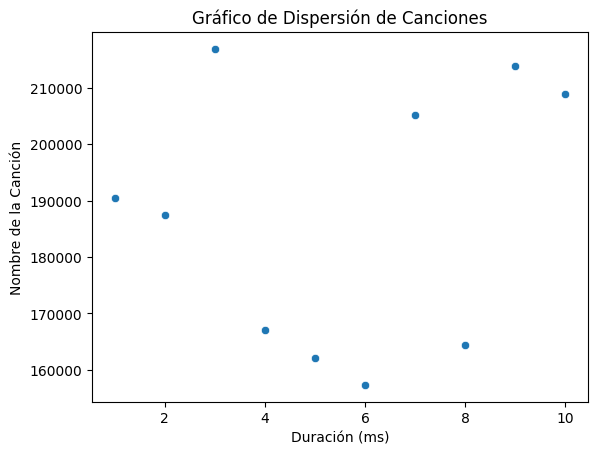

In [267]:
y=table["Duracion"]
X=table["Lugar"]

import seaborn as sns

sns.scatterplot(x=X, y=y)
plt.xlabel("Duración (ms)")
plt.ylabel("Nombre de la Canción")
plt.title("Gráfico de Dispersión de Canciones")
plt.show()
plt.show()

Por ultimo podemos deducir que no hay relación entre el lugar que ocupan y la duración de la canción.